## Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.


Min-Max scaling is a data preprocessing technique used to scale and normalize the numerical features of a dataset to a specific range, typically [0, 1]. The purpose of Min-Max scaling is to transform the original numerical values of features into a standardized scale, making them comparable and preventing the dominance of certain features due to differences in their magnitudes

Steps to Apply Min-Max Scaling:
Identify Numerical Features:

Determine which features in the dataset are numerical and require scaling.
Compute Min and Max Values:

For each numerical feature, calculate the minimum (X min and maximum (X max) values in the dataset.
Apply Min-Max Scaling:

Use the Min-Max scaling formula to transform the original values of each feature into the standardized [0, 1] range.
Updated Feature Values:

Replace the original values of the features with their scaled counterparts.
Example Illustration:
Let's consider a simple example with a dataset containing a single numerical feature, "House Area." The original values of house areas are in square feet, and we want to scale them to the range [0, 1].

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample dataset
data = {'House Area': [1200, 1500, 1800, 1000, 2000]}
df = pd.DataFrame(data)

# Step 2: Compute Min and Max Values
min_area = df['House Area'].min()
max_area = df['House Area'].max()

# Step 3: Apply Min-Max Scaling
df['House Area Scaled'] = (df['House Area'] - min_area) / (max_area - min_area)

# Display the original and scaled values
print("Original House Area:")
print(df['House Area'])
print("\nScaled House Area:")
print(df['House Area Scaled'])


Original House Area:
0    1200
1    1500
2    1800
3    1000
4    2000
Name: House Area, dtype: int64

Scaled House Area:
0    0.2
1    0.5
2    0.8
3    0.0
4    1.0
Name: House Area Scaled, dtype: float64


In this example, the Min-Max scaling formula is applied to the "House Area" feature, transforming the original house areas into a standardized scale between 0 and 1.

Benefits of Min-Max Scaling:
Preservation of Relationships: Min-Max scaling preserves the relationships and relative distances between data points while ensuring they fall within a consistent range.
Avoidance of Dominance: Prevents features with larger magnitudes from dominating the model during training, especially in algorithms sensitive to feature scales (e.g., gradient-based optimization algorithms).
Improved Convergence: Can lead to faster convergence during the training of certain machine learning models.
Keep in mind that Min-Max scaling assumes that the data follows a roughly uniform distribution. If the distribution is significantly skewed, other scaling methods like Standard Scaling (Z-score normalization) might be more appropriate.

## Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.

Unit Vector technique, also known as vector normalization or "feature scaling by dividing by the magnitude," is a method used to scale and normalize the numerical features of a dataset. In this technique, each data point (vector) is scaled such that its magnitude (length) becomes 1. This normalization is performed by dividing each feature value by the Euclidean norm (magnitude) of the entire vector

Differences from Min-Max Scaling:
Range: Min-Max scaling scales features to a specific range (e.g., [0, 1]), while the unit vector technique scales each feature such that the magnitude of the resulting vector is 1.

Normalization Basis: Min-Max scaling normalizes based on the minimum and maximum values of each individual feature. In contrast, the unit vector technique normalizes based on the entire vector's magnitude.

Example Illustration:
Let's consider a simple example with a dataset containing two numerical features, "X" and "Y." We will use the unit vector technique to normalize the vectors.

In [3]:
import pandas as pd
from sklearn.preprocessing import normalize

# Sample dataset
data = {'X': [3, 4, 1, 5], 'Y': [1, 2, 3, 4]}
df = pd.DataFrame(data)

# Apply Unit Vector Scaling
df_normalized = pd.DataFrame(normalize(df, norm='l2', axis=1), columns=['X_normalized', 'Y_normalized'])

# Display the original and normalized values
print("Original Vectors:")
print(df)
print("\nNormalized Vectors:")
print(df_normalized)


Original Vectors:
   X  Y
0  3  1
1  4  2
2  1  3
3  5  4

Normalized Vectors:
   X_normalized  Y_normalized
0      0.948683      0.316228
1      0.894427      0.447214
2      0.316228      0.948683
3      0.780869      0.624695


In this example, the unit vector technique is applied to normalize the vectors "X" and "Y." The resulting vectors have a magnitude of 1, and each feature is scaled proportionally.

Benefits of Unit Vector Technique:
Directional Information: The unit vector technique retains the directional information of the original vectors while ensuring they are on the unit circle.

Normalization Across Features: It normalizes features based on the overall magnitude of the vector, considering the relationships between features.

Useful for Distance Measures: Particularly useful when working with algorithms that rely on distance measures, such as k-nearest neighbors or clustering algorithms.

It's important to note that the choice between Min-Max scaling and the unit vector technique depends on the specific requirements of the machine learning task and the characteristics of the data. Each scaling technique has its advantages and may be more suitable for different scenarios.






## Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.

Principal Component Analysis (PCA) is a technique in statistics and machine learning that is commonly used for dimensionality reduction. It transforms high-dimensional data into a new coordinate system (principal components) where the data's variability is maximized along the new axes. The goal is to retain the most important information in the data while reducing its dimensionality.

Key Steps in PCA:
Standardization:

Standardize the features by subtracting the mean and scaling by the standard deviation. This step ensures that all features have a similar scale.
Covariance Matrix Computation:

Calculate the covariance matrix of the standardized data. The covariance matrix provides information about the relationships between different features.
Eigenvalue and Eigenvector Calculation:

Find the eigenvalues and eigenvectors of the covariance matrix. Eigenvectors represent the principal components, and eigenvalues indicate the magnitude of variance along each eigenvector.
Selection of Principal Components:

Sort the eigenvalues in descending order and select the top k eigenvectors to form the principal components, where 

k is the desired dimensionality of the reduced data.
Projection:

Project the original data onto the selected principal components to obtain the lower-dimensional representation.
Example Illustration:
Let's consider a simple example with a 2D dataset. We'll perform PCA to reduce the dimensionality from 2D to 1D.

Original Data:
   Feature1  Feature2
0         2         3
1         3         4
2         5         2
3         7         8
4         9         7

Reduced-Dimensional Data:
   Principal Component
0            -1.281906
1            -0.761795
2            -0.814288
3             1.318652
4             1.539337


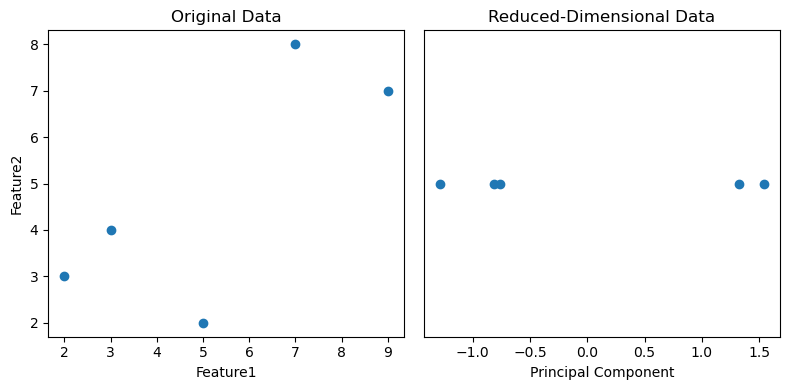

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample 2D dataset
data = {'Feature1': [2, 3, 5, 7, 9], 'Feature2': [3, 4, 2, 8, 7]}
df = pd.DataFrame(data)

# Step 1: Standardization
mean_values = df.mean()
std_dev_values = df.std()
df_standardized = (df - mean_values) / std_dev_values

# Step 2-4: PCA
pca = PCA(n_components=1)
principal_components = pca.fit_transform(df_standardized)

# Display the original and reduced-dimensional data
print("Original Data:")
print(df)
print("\nReduced-Dimensional Data:")
print(pd.DataFrame(principal_components, columns=['Principal Component']))

# Plot original and reduced-dimensional data
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(df['Feature1'], df['Feature2'])
plt.title('Original Data')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.subplot(1, 2, 2)
plt.scatter(principal_components, np.zeros_like(principal_components))
plt.title('Reduced-Dimensional Data')
plt.xlabel('Principal Component')
plt.yticks([])

plt.tight_layout()
plt.show()


In this example, PCA is applied to the 2D dataset, and the dimensionality is reduced to 1D (a single principal component). The scatter plots illustrate the original data and the reduced-dimensional representation.

Benefits of PCA for Dimensionality Reduction:
Variance Retention: PCA retains as much variance as possible in the original data, ensuring that important information is preserved.

Decorrelation: Principal components are orthogonal to each other, leading to a decorrelated representation of the data.

Noise Reduction: By focusing on the principal components with the highest variance, PCA can help reduce the impact of noise in the data.

Visualization: PCA facilitates the visualization of high-dimensional data in lower dimensions, making it easier to interpret and analyze.

It's important to note that the choice of the number of principal components (
�
k) involves a trade-off between reducing dimensionality and retaining sufficient information. This trade-off can be explored by examining the explained variance ratio provided by PCA.






## Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.

Principal Component Analysis (PCA) is closely related to feature extraction, as PCA is essentially a technique for transforming the original features of a dataset into a new set of features (principal components) that capture the maximum variance in the data. In the context of feature extraction, PCA helps identify the most informative features while discarding less important ones. This is achieved by projecting the data onto a lower-dimensional subspace defined by the principal components.

Relationship between PCA and Feature Extraction:
Dimensionality Reduction:

PCA is primarily used for dimensionality reduction by selecting a subset of the most relevant features (principal components). This results in a lower-dimensional representation of the data while preserving its essential characteristics.
Feature Selection:

The principal components in PCA can be seen as new features that are linear combinations of the original features. The selection of principal components effectively prioritizes the most informative aspects of the data.
Reducing Redundancy:

PCA helps in reducing redundancy and correlation among the original features. The principal components are orthogonal, providing a decorrelated representation that focuses on capturing the maximum variance.
Using PCA for Feature Extraction - Example:
Let's consider a dataset with multiple features, and we'll use PCA for feature extraction to reduce the dimensionality.

python

Original Data:
   Feature1  Feature2  Feature3
0  0.374540  0.562858  0.926095
1  0.950714  1.772821 -0.747580
2  0.731994  1.128712 -0.515114
3  0.598658  1.517141  1.695663
4  0.156019  2.315133  0.819287

Principal Components:
        PC1       PC2
0 -0.525380 -0.853958
1  1.334327  0.041116
2  0.994578 -0.548054
3 -1.121433  0.208053
4 -0.129402  0.861776


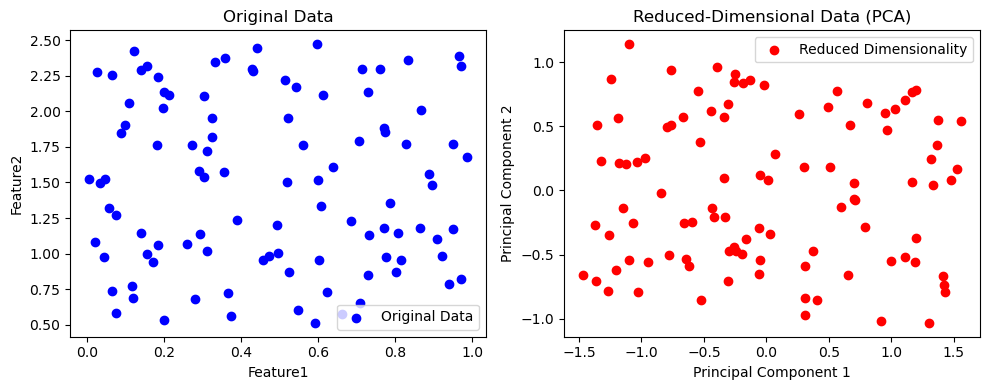

In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate synthetic data with correlation
np.random.seed(42)
data = {'Feature1': np.random.rand(100),
        'Feature2': 2 * np.random.rand(100) + 0.5,
        'Feature3': 3 * np.random.rand(100) - 1}
df = pd.DataFrame(data)

# Apply PCA for feature extraction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

# Display the original and reduced-dimensional data
print("Original Data:")
print(df.head())
print("\nPrincipal Components:")
print(pd.DataFrame(principal_components, columns=['PC1', 'PC2']).head())

# Plot original and reduced-dimensional data
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(df['Feature1'], df['Feature2'], c='blue', label='Original Data')
plt.title('Original Data')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='red', label='Reduced Dimensionality')
plt.title('Reduced-Dimensional Data (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()


n this example, PCA is applied to the synthetic dataset with three features. The resulting principal components (PC1 and PC2) are used to represent the data in a reduced-dimensional space. The scatter plots visually demonstrate the original data and the reduced-dimensional representation obtained through PCA.

Benefits of PCA for Feature Extraction:
Dimensionality Reduction: PCA reduces the number of features, making the dataset more manageable and potentially improving the efficiency of machine learning algorithms.

Noise Reduction: By focusing on principal components with higher variance, PCA can help reduce the impact of noise in the data.

Interpretability: Principal components often capture underlying patterns or relationships in the data, making them more interpretable and informative than the original features.

Computational Efficiency: Using a reduced set of features speeds up the training and evaluation of machine learning models.

While PCA is powerful for feature extraction and dimensionality reduction, it's essential to consider the interpretability of the transformed features and the trade-off between dimensionality reduction and information retention.

## Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.

In the context of building a recommendation system for a food delivery service with features such as price, rating, and delivery time, Min-Max scaling can be applied to preprocess the data. Min-Max scaling is a method that transforms numerical features to a specific range, typically [0, 1], making them comparable and preventing features with larger magnitudes from dominating the recommendation algorithm. Here's how you could use Min-Max scaling for preprocessing:

Let's consider a simple example with a pandas DataFrame containing price, rating, and delivery time features.


In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample dataset
data = {'price': [10, 15, 20, 25, 30],
        'rating': [4.5, 3.8, 4.2, 4.8, 3.5],
        'delivery_time': [20, 30, 25, 40, 35]}

df = pd.DataFrame(data)

# Step 2: Compute Min and Max Values
min_values = df.min()
max_values = df.max()

# Step 3: Apply Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Display original and scaled data
print("Original Data:")
print(df)
print("\nScaled Data:")
print(df_scaled)


Original Data:
   price  rating  delivery_time
0     10     4.5             20
1     15     3.8             30
2     20     4.2             25
3     25     4.8             40
4     30     3.5             35

Scaled Data:
   price    rating  delivery_time
0   0.00  0.769231           0.00
1   0.25  0.230769           0.50
2   0.50  0.538462           0.25
3   0.75  1.000000           1.00
4   1.00  0.000000           0.75


In this example, Min-Max scaling is applied to the features (price, rating, and delivery time) using the MinMaxScaler from scikit-learn. The resulting df_scaled DataFrame contains the scaled values of each feature within the range [0, 1].

Considerations:
Interpretability: Min-Max scaling preserves the relationships and relative distances between data points, but the scaled values may not be as directly interpretable as the original values. Ensure that the interpretation aligns with the requirements of the recommendation system.

Scaling Range: While [0, 1] is a common range, you can customize the scaling range based on the specific requirements of your recommendation system.

Consistency: Apply the same scaling transformation to training and testing datasets to maintain consistency in feature scaling.

By applying Min-Max scaling to the numerical features in the food delivery dataset, you ensure that each feature contributes proportionally to the recommendation system without being influenced by differences in their original magnitudes.

## Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.

In the context of building a model to predict stock prices with a dataset containing many features, Principal Component Analysis (PCA) can be employed to reduce the dimensionality of the dataset. Dimensionality reduction is particularly useful when dealing with a large number of features, as it can help improve model efficiency, mitigate the curse of dimensionality, and potentially enhance the model's generalization performance. Here's how you could use PCA for dimensionality reduction in the context of predicting stock prices:

Steps to Use PCA for Dimensionality Reduction:
Identify Numerical Features:

Determine which features in the dataset are numerical and are candidates for dimensionality reduction. In a stock price prediction context, these could include various financial metrics, market trends, and related indicators.
Standardization:

Standardize the numerical features by subtracting the mean and scaling by the standard deviation. This step ensures that all features have a similar scale, which is important for PCA.
Apply PCA:

Apply PCA to the standardized dataset. PCA will identify the principal components (linear combinations of the original features) that capture the maximum variance in the data.
Choose the number of principal components based on the desired level of dimensionality reduction. This choice may involve considering the cumulative explained variance or other criteria.
Transform Data:

Transform the original dataset using the selected principal components. The transformed data will have a reduced number of features (principal components) that retain the most significant information in the dataset.
Model Training and Evaluation:

Train your stock price prediction model using the reduced-dimensional dataset.
Evaluate the model's performance on a validation or test set.
Example Implementation:
Let's illustrate the process using a simplified example with synthetic financial and market trend data.

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample dataset with financial and market trend features
# Replace this with your actual stock price prediction dataset
data = {'FinancialFeature1': [...],
        'FinancialFeature2': [...],
        'MarketTrend1': [...],
        'MarketTrend2': [...],
        'StockPrice': [...]}

df = pd.DataFrame(data)

# Step 2: Standardization
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df.drop(columns=['StockPrice']))

# Step 3: Apply PCA
pca = PCA(n_components=3)  # Choose the number of principal components
principal_components = pca.fit_transform(df_standardized)

# Display explained variance ratio to help choose the number of components
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Step 4: Transform Data
df_transformed = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])

# Combine transformed features with the target variable (StockPrice)
df_combined = pd.concat([df_transformed, df['StockPrice']], axis=1)

# Step 5: Model Training and Evaluation
X_train, X_test, y_train, y_test = train_test_split(df_combined.drop(columns=['StockPrice']),
                                                    df_combined['StockPrice'],
                                                    test_size=0.2,
                                                    random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


In this example, PCA is applied to the standardized financial and market trend features, and the dataset is transformed into a reduced-dimensional space with three principal components. The transformed features are then used to train a linear regression model to predict stock prices.

Considerations:
Choosing the Number of Components: The choice of the number of principal components depends on factors such as the desired level of dimensionality reduction, the cumulative explained variance, and the specific requirements of the stock price prediction task.

Interpretability: While PCA reduces dimensionality, the principal components may not have direct interpretability in terms of the original features. Consider the trade-off between interpretability and dimensionality reduction.

Impact on Model Performance: Evaluate how the dimensionality reduction affects the model's predictive performance. In some cases, reducing dimensionality may enhance efficiency and prevent overfitting, but it's crucial to monitor the impact on prediction accuracy.

By using PCA for dimensionality reduction, you can streamline the feature space and potentially improve the efficiency and performance of your stock price prediction model.






## Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.

To perform Min-Max scaling on a dataset and transform the values to a range of -1 to 1, you need to use the Min-Max scaling formula and apply it to each value in the datase

In [8]:
import numpy as np

# Original dataset
original_values = np.array([1, 5, 10, 15, 20])

# Step 1: Identify Min and Max values
min_value = original_values.min()
max_value = original_values.max()

# Step 2: Apply Min-Max scaling formula
scaled_values = (original_values - min_value) / (max_value - min_value)

# Step 3: Adjust the scaling to the range of -1 to 1
scaled_values_range_minus1_to_1 = 2 * scaled_values - 1

# Display the results
print("Original Values:", original_values)
print("Min-Max Scaled Values (Range: -1 to 1):", scaled_values_range_minus1_to_1)


Original Values: [ 1  5 10 15 20]
Min-Max Scaled Values (Range: -1 to 1): [-1.         -0.57894737 -0.05263158  0.47368421  1.        ]


n this example, the Min-Max scaled values have been transformed to the desired range of -1 to 1. The values now lie within the specified range while preserving their relative relationships and order.

## Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?


The decision on how many principal components to retain in PCA involves balancing the desire for dimensionality reduction with the need to retain a sufficient amount of information from the original dataset. One common approach is to use the cumulative explained variance to guide the selection of the number of principal components.

Here are the steps you can follow to determine how many principal components to retain:

Standardization: Standardize the numerical features in the dataset, which is a necessary step before applying PCA. This involves subtracting the mean and scaling by the standard deviation for each feature.

Apply PCA: Apply PCA to the standardized dataset.

Calculate Explained Variance: Examine the explained variance ratio for each principal component. The explained variance ratio represents the proportion of the total variance in the data that is captured by each principal component. This information is accessible through the explained_variance_ratio_ attribute of the PCA object.

Choose Number of Components: Select the number of principal components based on the cumulative explained variance. A common criterion is to choose the smallest number of components that collectively explain a sufficiently high percentage of the total variance (e.g., 95% or 99%).

In [9]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample dataset with features: height, weight, age, gender, blood pressure
# Replace this with your actual dataset
data = np.array([
    [170, 65, 30, 0, 120],
    [160, 55, 25, 1, 130],
    [180, 75, 35, 0, 110],
    [165, 60, 28, 1, 125],
    [175, 70, 32, 0, 118]
])

# Step 1: Standardization
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Step 2: Apply PCA
pca = PCA()
principal_components = pca.fit_transform(data_standardized)

# Step 3: Calculate Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Choose Number of Components based on Cumulative Explained Variance
cumulative_variance = np.cumsum(explained_variance_ratio)
threshold_variance = 0.95  # Example threshold (adjust as needed)
num_components_to_retain = np.argmax(cumulative_variance >= threshold_variance) + 1

# Display the results
print("Explained Variance Ratio for each component:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_variance)
print("Number of Principal Components to Retain:", num_components_to_retain)


Explained Variance Ratio for each component: [9.50495160e-01 4.59046350e-02 3.35108261e-03 2.49122719e-04
 2.99154085e-34]
Cumulative Explained Variance: [0.95049516 0.99639979 0.99975088 1.         1.        ]
Number of Principal Components to Retain: 1


In this example, the number of principal components to retain is chosen based on a cumulative explained variance threshold of 95%. Adjust the threshold according to your specific requirements. The output will provide insights into how much variance is explained by each component and help you make an informed decision on the number of components to retain for feature extraction.




